In [1]:
%matplotlib inline
import skyflux

Missing flux value for: GLEAM J202818-254302 at frequency: 204 MHz.
Missing flux value for: GLEAM J202818-254302 at frequency: 212 MHz.
Missing flux value for: GLEAM J202818-254302 at frequency: 220 MHz.
Missing flux value for: GLEAM J202818-254302 at frequency: 227 MHz.
Missing spectral index for: GLEAM J202818-254302


//anaconda3/envs/hera/lib/python3.8/site-packages/spin1_beam_model/jones_matrix_field.py:18: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  self.pos1_Elm_samples = h5f["pos1_Elm"].value
//anaconda3/envs/hera/lib/python3.8/site-packages/spin1_beam_model/jones_matrix_field.py:19: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  self.neg1_Elm_samples = h5f["neg1_Elm"].value
//anaconda3/envs/hera/lib/python3.8/site-packages/spin1_beam_model/jones_matrix_field.py:20: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  self.freq_nodes = h5f["frequencies"].value
//anaconda3/envs/hera/lib/python3.8/site-packages/spin1_beam_model/jones_matrix_field.py:21: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  self.L_model = h5f["spatial_bandlimit"].value
//anaconda3/envs/hera/lib/python3.8/site-packages/spin1_beam_model/jones_matrix_field.py:22: H5pyDeprec

delta_nu_in is 1000000.0


In [4]:
import matplotlib.pyplot as plt
import numpy as np
import healpy as hp

In [11]:
def project_J(J):
    hp.orthview(np.abs(J[:, 0, 0]), rot=[0, 90], half_sky=True, sub=[2, 2, 1], title='xx')
    hp.orthview(np.abs(J[:, 1, 0]), rot=[0, 90], half_sky=True, sub=[2, 2, 2], title='yx')
    hp.orthview(np.abs(J[:, 0, 1]), rot=[0, 90], half_sky=True, sub=[2, 2, 3], title='xy')
    hp.orthview(np.abs(J[:, 1, 1]), rot=[0, 90], half_sky=True, sub=[2, 2, 4], title='yy')

In [6]:
nside = 128
theta, phi = hp.pix2ang(nside, np.arange(12 * nside * nside))

In [8]:
print(theta)
print(phi)

[0.00637889 0.00637889 0.00637889 ... 3.13521376 3.13521376 3.13521376]
[0.78539816 2.35619449 3.92699082 ... 2.35619449 3.92699082 5.49778714]


[0.78539816 2.35619449 3.92699082 ... 2.35619449 3.92699082 5.49778714]
[ 1.56441744  1.56441744  1.56441744 ... -1.56441744 -1.56441744
 -1.56441744]


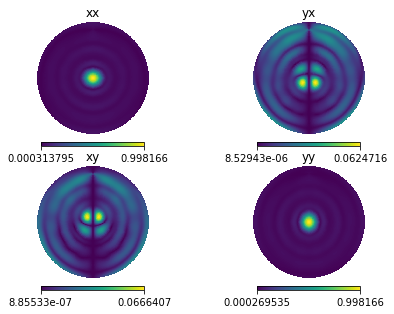

In [31]:
az = phi
alt = np.pi/2 - theta

print(az)
print(alt)

J_raw = skyflux.stokes.spline_beam_func(150e6, alt, az)
J = skyflux.stokes.format_J(J_raw)

project_J(J)

In [ ]:
# I really ought to get around to overloading:
    # A and J functions when I already have alt az
    # A and J functtions for which I input a source
    # A function when I already have a J

#src = skyflux.catalog.obj_catalog[87]
#ra = np.radians(src.ra_angle)
#dec = np.radians(src.dec_angle)
#A = skyflux.stokes.A_matrix(ra, dec)

J_outer = np.kron(J, np.conj(J))
A = np.dot(S, np.dot(J_outer, np.linalg.inv(S)))

print(A)

In [30]:
print(A.shape)

J = skyflux.stokes.J_matrix(ra, dec)

print(J_raw.shape)
print(J.shape)
print(J_raw[:, 0, 0].shape)

(4, 1, 4)
(196608, 2, 2)
(1, 2, 2)
(196608,)


In [28]:
hp.orthview(A[0][0][0], rot=[0, 90], half_sky=True, sub=[2, 2, 1], title='xx')

TypeError: input map is a scalar